# Part 5. Compiling to C

#### Read about the Conway’s Game of Life. Implement all solutions provided on the Cython Material (slides) to obtain the update of the lattice:
    a. Python
    b. Cython 1
    c. Cython 2
    d. Cython 3
    e. Cython 4

#### Explain the improvement on each solution. Reproduce the chart on pp. 33 with the runtime for each solution.

In [41]:
import time
import numpy as np
import matplotlib.pyplot as plt

# Import the compiled Cython modules and the Python code
import cython1
import cython2
import cython3
import cython4
import python
# Function to measure execution time
def time_function(func, *args, **kwargs):
    start_time = time.time()
    func(*args, **kwargs)
    return time.time() - start_time

# Generate a large lattice for testing
lattice = np.random.randint(2, size=(1500, 1500))

# Time each function
python_time = time_function(python.update, lattice)
cython1_time = time_function(cython1.update, lattice)
cython2_time = time_function(cython2.update, lattice)
cython3_time = time_function(cython3.update, lattice)
cython4_time = time_function(cython4.update, lattice)

# Collect the times
times = [python_time, cython1_time, cython2_time, cython3_time, cython4_time]
labels = ['Python', 'Cython1', 'Cython2', 'Cython3', 'Cython4']

# Print the times before the chart
for label, time in zip(labels, times):
    print(f'{label}: {time:.2f} sec')

Python: 19.59 sec
Cython1: 15.12 sec
Cython2: 14.08 sec
Cython3: 13.14 sec
Cython4: 13.94 sec


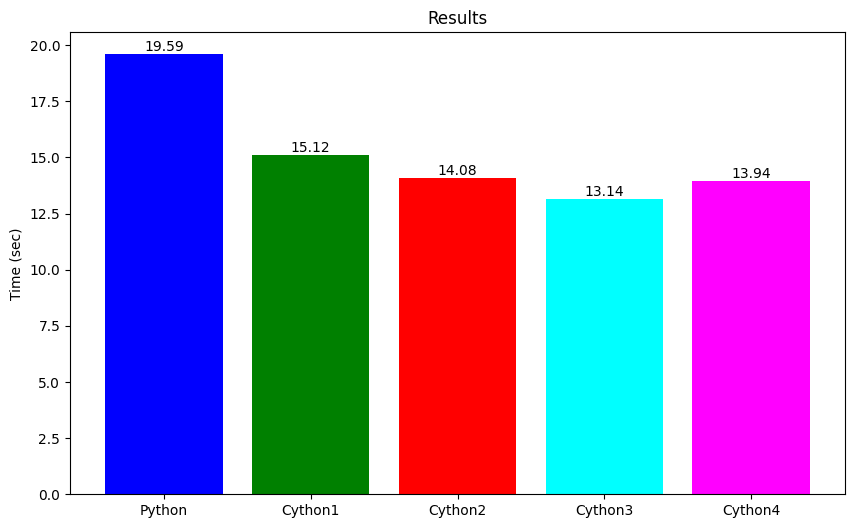

In [42]:
# Plot the results
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, times, color=['blue', 'green', 'red', 'cyan', 'magenta'])
plt.ylabel('Time (sec)')
plt.title('Results')

# Adding text labels above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

#### Python (Baseline):
The original Python implementation uses nested loops to iterate over a lattice (a two-dimensional array) and applies an update_rule to each element. This version serves as the baseline for performance comparison. It is fully written in Python without any static type definitions or compilation optimizations, resulting in the longest execution time among the versions tested.

#### Cython1:
Cython1 is the initial conversion of the Python code into Cython, without introducing specific Cython optimizations like static typing. The primary improvement comes from compiling the Python code into C, which provides some performance gains due to the compiled nature of the output. However, as there are no significant Cython-specific enhancements, the performance gain over the pure Python version is modest.

#### Cython2:
Cython2 introduces static typing for variables within the functions using Cython's cdef. This optimization allows the C compiler to make more efficient use of memory and CPU instructions since the types of variables are known at compile time. As a result, Cython2 demonstrates improved performance over Cython1 due to reduced overhead from dynamic typing.

#### Cython3:
Cython3 extends upon the previous optimizations by converting the update_rule function from a Python function to a C function using cdef. This change significantly reduces the call overhead since the function is now a native C function, leading to faster execution, especially since this function is called repeatedly in tight loops. Cython3 shows a noticeable improvement in performance, highlighting the benefits of converting frequently used functions to C.

#### Cython4:
Cython4 builds upon the earlier versions by adding Cython compiler directives to disable bounds checking (boundscheck=False) and negative index wraparound (wraparound=False). These changes aim to further optimize array access performance by removing runtime checks. 